<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/colab_notebooks/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with neural networks in TensorFlow

Regression problem: predicting a numerical variable based on some other variation of variables

In [67]:
import tensorflow as tf
print(tf.__version__)

2.9.2


### Create data to view and fit

- features are usually defined in uppercase `X`, labels in lowercase `y`

Here we create a simple feature and label lists where the relationship is y (label) = feature (Y) + 10

Input shape: [8,] (8 numbers)
Output shape: [1,] (one number)

*Much easier way than the way I did it further down below:*

```
X = tf.range(-7, 15, 3)
y = X + 10
```

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# create features
# x = np.array([-7., -4., -1., 2, 5., 8., 11., 14.])
X = np.array(range(-7, 15, 3))
X

array([-7, -4, -1,  2,  5,  8, 11, 14])

In [69]:
# Create labels
y = np.array(range(3,25, 3)).astype(float)
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

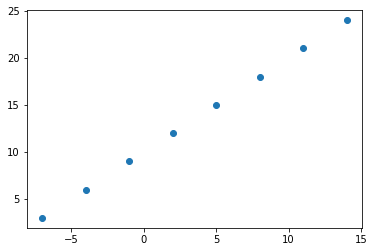

In [70]:
# Visualize
plt.scatter(X,y)

In [71]:
# this is the rule we want the neural network to learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

Create a demo tensor for house pricing prediction problem (see main readme), where we already know the input / output shape from the info graphic and try to deduce the shapes for our X, y arrays.

In [72]:
house_info = tf.constant([3, 2, 1]) # 3 bedrooms, 2 bathrooms, 1 garage
house_price = tf.constant([939700])

house_info, house_price


(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 2, 1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

The house info contains just one item of shape 3, our `X` contains 8 of shape 1 (just one number), as does the desired output.

So the input shape is 1, as is the output shape for our simple example (that we have 8 items in those arrays doesn't matter for the input / output shape!)


In [73]:
print(X[0], "should predict", y[0])
print(X[1], "should predict", y[1])
print("etc...")

-7 should predict 3.0
-4 should predict 6.0
etc...


In [74]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim

((), (), 0)

Why is there no shape?

Scalars (single numbers) are a rank 0 tensor (0 dimensions).

In the following code, we need to expand the dimensions of the input vector when fitting a model (automatic in TensorFlow up to 2.6, manual from 2.7 onward) to avoid a `shape error`:

```
## OLD
# Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
## New
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated 
```

`axis=-1 ` adds an innermost dimension as per python indexing rules where -1 = last index

In [75]:
# turn arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [76]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim

(TensorShape([]), TensorShape([]), 0)

### Steps in modelling with TensorFlow

1. Creationg a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model
  - define the loss function (the function which tells the model how wrong it is) 
  - the optimizer (tells the model how to improve the patterns it is learning) 
  -evaluation metrics (what we can use to interpret the performance of the model)
3. Fitting a model - let the model try to find patterns between X and y (features and labels)

![steps in modeling with tensorflow](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/tensorflow_modeling_steps.png?raw=1)

In [77]:
tf.random.set_seed(42)

# 1. Create a model using the sequential API
# layers can also be added with 
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1)) 
# instead of passing them as an array
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # "1" because we want to predict 1 number
])


# 2. compile the model 
model.compile(
    # or .mean_absolute_error, Computes the mean absolute error between labels and predictions.
    # loss = mean(abs(y_true - y_pred), axis=-1)
    # where y_true is the correct value, y_pred the prediction the model makes
    # "on average, how wrong were our predictions"
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent;
    metrics=["mae"] # most functions can be passed as string, e.g. optimizer="sgd"
  )

# 3. Fit the model
# Sequential groups a linear stack of layers into a tf.keras.Model.
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # 5 "laps"



Epoch 1/5
1/1 [==============================] - 0s 223ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [78]:
print(X, y)
model.predict([17.]) # SHOULD be 27.0

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)
1/1 [==============================] - 0s 38ms/step


array([[12.716021]], dtype=float32)

That's a pretty bad prediction.

### Improving a model with Tensorflow

We can try to improve a model on each of the 5 steps. The best would be to have more training data.

1. **Creating a model** - add more layers, increase number of hidden units (aka neurons) within each layer, change the [activation function](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/) of each layer.
2. **Compiling a model** - change optimization function or **learning rate** of the optimization function
3. **Fitting the model** - more epochs, give more data


Do small singular changes in experiments to see what causes a model to perform better (or *worse*!)

**Common ways to improve a deep model:**

- Adding layers
- Increase the number of hidden units (neurons)
- Change the activation functions
- Change the optimization function
- Change the learning rate; **this is potentially the most important hyperparameter to change**
- Fitting on more data (if available)
- Fitting for longer (easiest, just add more epochs)


#### More epochs

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

# 100 epochs instead of 5 - loss goes down
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0) # more epochs (skip output)

In [80]:
model.predict([17.])

1/1 [==============================] - 0s 37ms/step


array([[29.739855]], dtype=float32)

The prediction has improved significantly already

#### Add a layer / hidden units / activation function

In [81]:
# reminder of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [82]:
# add more layers, more neurons and an activation
model = tf.keras.Sequential([
    # add another layer, more hidden units and change the activation function
    # we can change each of these separately
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = "mae", # just an alternative way to define the loss function
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [83]:
model.predict([17.])

1/1 [==============================] - 0s 42ms/step


array([[32.7789]], dtype=float32)

The prediction actually got worse, even though the loss got lower (change verbose to 'auto' in model.fit to see steps).

This is called [**overfitting**](https://www.ibm.com/topics/overfitting), meaning the model learns the training data *too* well. In other words, the lower loss we see isn't representative to data the model hasn't seen before.

#### Change optimizer and **learning rate**

In [84]:
# we keep the changes from before
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = "mae",
    # Adam is a common and useful optimizer, often the default
    # the higher the learning rate, the quicker the optimizer pushes
    # the model to improve
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
  )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0) # loss goes down to 0.x in the last iterations

In [85]:
model.predict([17.]) # almost perfect fit

1/1 [==============================] - 0s 39ms/step


array([[26.921337]], dtype=float32)

### Evaluating a model

In practice, a typical workflow is:

Build a model -> fit it -> evaluate it -> tweak -> evaluate -> tweak -> ...

- Building models: experiment, experiment, experiment
- Evaluating models: **visualize, visualize, visualize**

Things to visualize:

- The data - what are we working with? What does it look like?
- The model - what does our model look like?
- The training of a model - how does a model perform while it learns?
- The predictions - how do the predictions of the model line up against the ground truth (the original labels)?


In [86]:
# Make a bigger dataset (in practice rarely available)
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [87]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

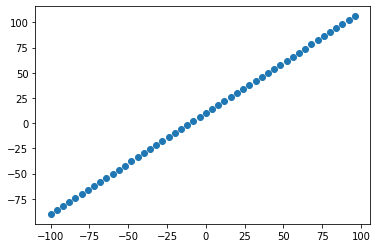

In [88]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

#### Digression: The 3 sets...

- **Training set** (what the model learns from); typically 70%-80% of availiable data (analogy: course materials)
- Validation set - what the model is tuned on; typically 10%-15% (analogy: practice exam)
- **Test set** - the model gets evaluated on this data to test what it has learned, typically 10%-15% (analogy: final exam)

Validation set is optional (tuning / testing can be done on one set).

Goal: **Generalization** of the model - make the model perform well on data it hasn't seen before



In [89]:
# Check the length of samples
len(X)

50

In [90]:
# split into training and test sets from available data
X_train = X[:40] # 80%
X_test = X[40:] # 209%
y_train = y[:40]
y_test = y[40:]
X_train, y_train, X_test, y_test, len(X_train), len(X_test)

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 40,
 10)

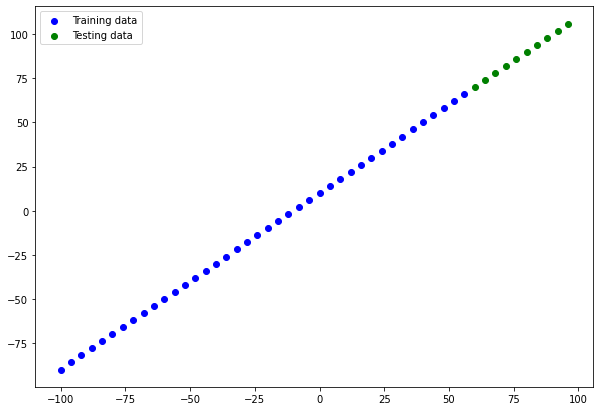

In [91]:
# Visualize the test / training data again
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="blue", label="Training data")
plt.scatter(X_test, y_test, c="green", label="Testing data")
plt.legend();

### Visualize the model

In [92]:
# create a model again (simple model from the start)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

# No fitting for now to show how to use model.build
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [93]:
try:
  model.summary()
except ValueError as err:
  print(err)

This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.


In [94]:
# Create a model which builds automatically by defining the input_shape
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]) # shape = 1 because we pass just one number
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


The numbers in the model and layer names just denotes an identifier for the models / layers created in the session, if none given with a "name" parameter.

- **Dense** = **Fully connected** = **linear layer** = every input neuron is connected to every output neuron
- Output shape is = number of hidden units (?)
- Total params: total number of parameters in the model (how many patterns the model is going to try and learn)
- Trainable params: parameters / patterns the model can update as it trains
- Non-trainable params: frozen patterns in existing models; aren't updated during training. Typicdal when bringing n already learned patterns / parameters during **transfer learning**.

**Resource:** 

http://introtodeeplearning.com/ (from january 2023 on)

http://introtodeeplearning.com/2022/index.html

- **Exercise:** tryp playing around with the nubmer of hidden units and see how it affects the number of parameters.
  - seems like the output shape = number of hidden layers (and not the defined output shape)
  - parameters are 2 * num of hidden layers; 2 is probably the input -> output (one X for one y); **2 trainable parameters per dense hidden unit**

In [95]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [96]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


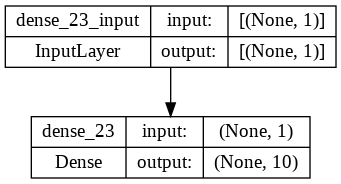

In [97]:
# visualize model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

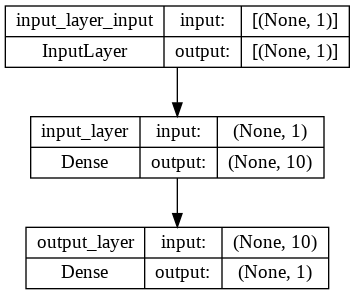

In [98]:
# Add layers / neuros to check how output changes
# Also, name layers and the model itself for easier reading
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer"),
], name="two_layer_model")

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)


plot_model(model, show_shapes=True)

In [99]:
model.summary()

Model: "two_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Visualizing the models predictions

To visualize predictions, it's a good idea to plot them agains the ground truth labels.

In practice these are often named `y_test` (like here), `y_true` vs `y_pred`

In [100]:
# define a reusable plot function
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="blue", label="Training data")
  plt.scatter(test_data, test_labels, c="green", label="Testing data") # true values
  plt.scatter(test_data, predictions, c="red", label="Predictions") # predictions
  plt.legend()

In [101]:
# create model and fit it to be in sync with the course videos
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=50, verbose=0) # with inut shape defined above we don't have to expand dimensions it seems

1/1 [==============================] - 0s 38ms/step


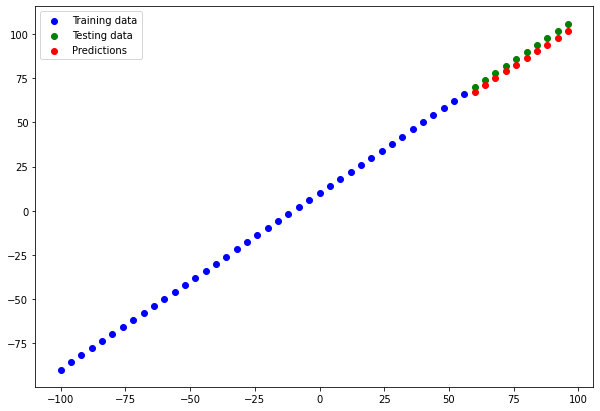

In [102]:
# check / visualize predictions of test data
y_pred=model.predict(y_test)
plot_predictions(train_data=X_train, 
                 train_labels=y_train, 
                 test_data=X_test, 
                 test_labels=y_test, 
                 predictions=y_pred)
# model.predict([17.]) 

### Evaluating predictions with regression evaluation metrics

Depending on the problem, there are different evaluation metrix for the models evaluation.

Regression problems have two main metrics:

- MAE: mean absolute error, "on average, how wrong is each of my models predictions"
- MSE: mean square error, "square the average errors"


![regression metrics](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/regression_metrics.png?raw=1)


- Σ = sum of
- |value| = absolute value
- ŷ = y_pred = the predictions

In [103]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 71ms/step - loss: 12.9609 - mae: 12.9609


[12.9609375, 12.9609375]

In [104]:
y_pred

array([[ 67.408585],
       [ 71.22382 ],
       [ 75.03906 ],
       [ 78.8543  ],
       [ 82.66955 ],
       [ 86.48479 ],
       [ 90.300026],
       [ 94.115265],
       [ 97.930504],
       [101.74574 ]], dtype=float32)

In [105]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 67.408585,  71.22382 ,  75.03906 ,  78.8543  ,  82.66955 ,
        86.48479 ,  90.300026,  94.115265,  97.930504, 101.74574 ],
      dtype=float32)>

In [106]:
# calculate the mean absolute error

# y_pred has an extra dimension for some reason, so we make it 1-dimensional using
# tf.squeeze

# 1. by hand
y_pred_onedim = tf.squeeze(y_pred);
y_test_float = tf.cast(y_test, dtype="float")

mae = np.sum(np.abs(y_test_float - y_pred)) / len(y_pred_onedim)
print("hand: ", mae)

# 2. using tensorflow
# print(tf.keras.losses.MAE(y_test, y_pred_onedim))# same
print(tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)))

hand:  132.43905029296874
tf.Tensor(3.4228356, shape=(), dtype=float32)


In [107]:
# Calculate mean squared error

# 1. by hand
mse = 1/len(y_pred_onedim) * np.sum((y_test_float - y_pred_onedim)**2)
print("hand: ", mse)

# 2. using tensorflow
print(tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred)))

hand:  11.997427368164063
tf.Tensor(11.997427, shape=(), dtype=float32)


In [108]:
# some functions for later use
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_test, 
                                        tf.squeeze(y_pred) if y_pred.ndim > y_true.ndim else y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_test, 
                                        tf.squeeze(y_pred) if y_pred.ndim > y_true.ndim else y_pred)

In [109]:
print(mae(y_test, y_pred))

tf.Tensor(3.4228356, shape=(), dtype=float32)


### Running experiments to improve the model

1. Get more data for the model to train on (rarely possible)
2. Make the model larger (using a more complex model) - more layers, hidden units
3. Train for longer - give the model more chances to find patterns

In the following, we'll do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for **100** epochs
2. `model_2` - **2** layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for **500** epochs

In [110]:
# data reminder
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

#### Start with a simple model

In [111]:
tf.random.set_seed(42)

# create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
    ], name="model_1"
)

# compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1, verbose=0)

1/1 [==============================] - 0s 167ms/step


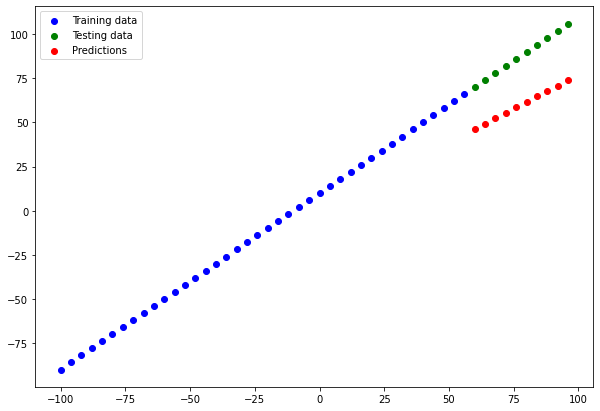

In [112]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test);
plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [113]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=27.925955>,
 <tf.Tensor: shape=(), dtype=float32, numpy=786.83826>)

#### Increasing complexity

Build `model_2` with 2 dense layers, trained for 100 epochs

In [114]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # the last layer must only have one neuron, otherwise we get a shape of 10 (investigate!)
], name="model_2")

model_2.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mse,
                metrics=["mae"]) # we also change metrics here contrary to the "plan"...

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 34ms/step


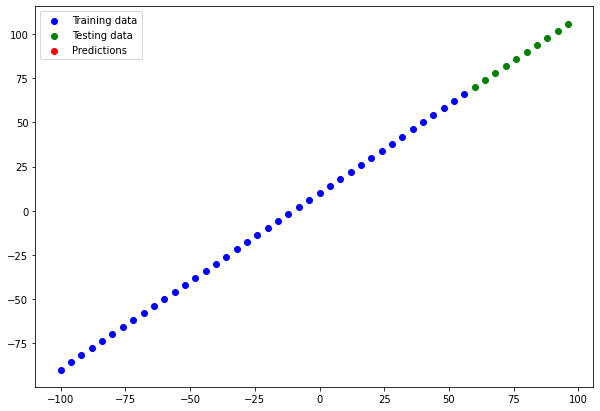

In [115]:
y_preds_2 = model_2.predict(y_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [116]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2


(<tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>)

Build model 3, increasing to 500 epochs

In [117]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="model_3")

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 34ms/step


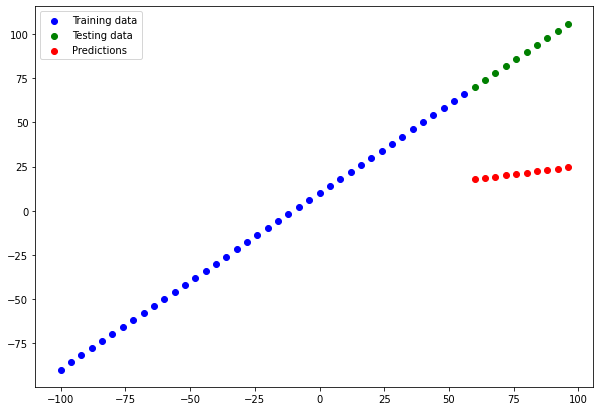

In [118]:
y_preds_3 = model_3.predict(y_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)

In [119]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=66.807144>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4549.661>)

This got way worse.

From a helpful comment by Michael on lecture 56 (contrary to what the video says):

**It's not overfitting, it is failure to converge**

>For model_3, we can plot the history of epoch vs loss (like will be shown in one of the next lectures). We expect to see the loss decrease as the model trains for more metrics. But what we get is this:

``` 
# Fit the model (this time for 500 epochs, not 100)
history_3 = model_3.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output
 
# Plot history (also known as a loss curve)
import pandas as pd
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
```
>It shows us that the model is failing to converge. And we were very lucky to get a loss of only 1.5 for the model at 100 iterations. At the end of most epochs, we have a loss of between 10 and 20.

>What to do? The answer is that the learning rate is too high. We need to tell the SGD optimizer to take smaller steps at each iteration.

```
# ...
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
# ...
```
>In the first version of the model, with default learning_rate, the loss is fluctuating randomly, mostly between 10 and 20. In the second version (the model has the same structure, but is compiled with a smaller learning rate), we see a much more stable convergence. 

In [120]:
import pandas as pd
def plot_history(history):
  pd.DataFrame(history.history).plot()
  plt.ylabel("loss")
  plt.xlabel("epochs")

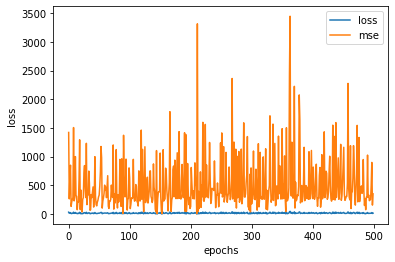

In [121]:
# try the history visualization from above
history_3 = model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)
plot_history(history_3)

Lower learning rate

1/1 [==============================] - 0s 32ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=2.7926185>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.805606>)

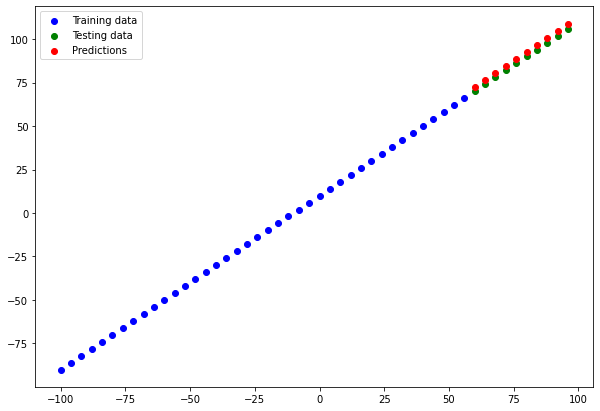

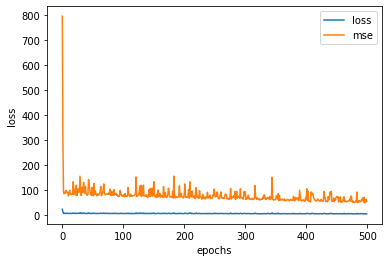

In [122]:
tf.random.set_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="model_4")

model_4.compile(loss=tf.keras.losses.mae, metrics=["mse"], optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))

history_4 = model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

y_preds_4 = model_4.predict(y_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_4)
plot_history(history_4)

mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

**Note**: when experimenting, start with small models and increase complexity when needed 

### Comparing the results of our experiments

In [123]:
# Compare results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()]
                 ]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results.sort_values(by="mae")

,model,mae,mse
3,model_4,2.792619,7.805606
0,model_1,27.925955,786.838257
2,model_3,66.807144,4549.661133
1,model_2,NaN,NaN


In [124]:
# model 4 performed best
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                20        
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note**: One of the main goals should be to minimize the time between experiments. The more experiments are done, the more things you'll figure out what works / what doesn't.

### Tracking your experiments

One good habit in ML modelling is to track the results of the experiments.

Tools to help with this:

- [**TensorBoard**](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments
- [**Weights & Biases**](https://wandb.ai/site) - a tool for tracking all kinds of ML experiments and plugs into TensorBoard

### Saving and loading a TensorFlow model

2 main formats:

1. SavedModel (default, tensorflow specific)
2. HDF5

The models can then be downloaded from google colab

**Note**: all save / load code commented out so the notebook hopefuly displays on github again

In [125]:
# save model in 2 different formats
# model_4.save('model_4_SavedModel') # SavedModel

# model_4.save('model_4.h5') # saves automatically as hd5 when providing the .h5 extension

In [126]:

# load model
# model_4_savedmodel = tf.keras.models.load_model('/content/model_4_SavedModel')
# model_4_hd5 = tf.keras.models.load_model('/content/model_4.h5')

In [127]:
# test models
# model_4_savedmodel.summary()

In [128]:
# check mae
# mae(y_test, model_4_savedmodel.predict(y_test)), mae(y_test, model_4.predict(y_test))

In [129]:
# check if the predictions work too (if the fitted data is also persisted)
# plot_predictions(X_train, y_train, X_test, y_test, model_4_savedmodel.predict(y_test))

In [130]:
# quick check hd5 version
# plot_predictions(X_train, y_train, X_test, y_test, model_4_hd5.predict(y_test))

### Download models (or any other file) from google colab)

1. Files: "files" tab left, right click on file and download; to download a folder, zip it first (see below, `!zip -r /content/model_4_SavedModel.zip /content/model_4_SavedModel`)
2. Code (see below)
3. Save to google drive (mount drive with icon on top, which creates a "drive" mount in `/content`)

In [131]:
# download with code
# from google.colab import files
# files.download('/content/model_4.h5')

In [132]:
# to download a folder, zip it first
# !zip -r /content/model_4_SavedModel.zip /content/model_4_SavedModel

### A larger example